In [2]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simple examples

In [ ]:
t = Table()

In [4]:
t.with_columns(
    "Name", make_array("California", "Nevada"))

Name
California
Nevada


In [5]:
t.with_columns(
    "Name", make_array("California", "Nevada"),
    "Code", make_array("CA",         "NV"))

Name,Code
California,CA
Nevada,NV


In [6]:
t.with_columns(
    "Name", make_array("California", "Nevada"),
    "Code", make_array("CA",         "NV"),
    "Area (m2)", make_array(163696, 110567))

Name,Code,Area (m2)
California,CA,163696
Nevada,NV,110567


In [ ]:
states = t.with_columns(
    "Name", make_array("California", "Nevada"),
    "Code", make_array("CA",         "NV"),
    "Area (m2)", make_array(163696, 110567))

In [9]:
states.column("Area (m2)")

array([163696, 110567])

In [10]:
states.column("Name")

array(['California', 'Nevada'], 
      dtype='<U10')

In [23]:
states.column("Name").item(0) # How can I get a single element?  Chain method calls.

'California'

## Minard

In [13]:
minard = Table.read_table("https://raw.githubusercontent.com/data-8r/textbook/gh-pages/notebooks/minard.csv")
minard

Longitude,Latitude,City,Direction,Survivors
32,54.8,Smolensk,Advance,145000
33.2,54.9,Dorogobouge,Advance,140000
34.4,55.5,Chjat,Advance,127100
37.6,55.8,Moscou,Advance,100000
34.3,55.2,Wixma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orscha,Retreat,20000
26.8,54.3,Moiodexno,Retreat,12000


In [14]:
minard.column("Survivors")

array([145000, 140000, 127100, 100000,  55000,  24000,  20000,  12000])

In [16]:
np.diff(minard.column("Survivors")) # What does this do?

array([ -5000, -12900, -27100, -45000, -31000,  -4000,  -8000])

In [ ]:
-1*np.diff(minard.column("Survivors"))

In [17]:
minard.column("Survivors") / sum(minard.column("Survivors")) # Is this the proportion of original soldiers?

array([ 0.23270743,  0.22468304,  0.2039801 ,  0.16048788,  0.08826834,
        0.03851709,  0.03209758,  0.01925855])

In [18]:
minard.column("Survivors") / minard.column("Survivors").item(0)

array([ 1.        ,  0.96551724,  0.87655172,  0.68965517,  0.37931034,
        0.16551724,  0.13793103,  0.08275862])

In [19]:
100 * minard.column("Survivors") / minard.column("Survivors").item(0)

array([ 100.        ,   96.55172414,   87.65517241,   68.96551724,
         37.93103448,   16.55172414,   13.79310345,    8.27586207])

In [42]:
minard_with_proportions = minard.with_columns(
    "Percent surviving",
    100 * minard.column("Survivors") / minard.column("Survivors").item(0))
minard_with_proportions

Longitude,Latitude,City,Direction,Survivors,Percent surviving
32,54.8,Smolensk,Advance,145000,100
33.2,54.9,Dorogobouge,Advance,140000,96.5517
34.4,55.5,Chjat,Advance,127100,87.6552
37.6,55.8,Moscou,Advance,100000,68.9655
34.3,55.2,Wixma,Retreat,55000,37.931
32,54.6,Smolensk,Retreat,24000,16.5517
30.4,54.4,Orscha,Retreat,20000,13.7931
26.8,54.3,Moiodexno,Retreat,12000,8.27586


## `group`

In [ ]:
icecream = Table().with_columns(
    'Flavor',
    make_array(
        'Chocolate',
        'Vanilla',
        'Vanilla',
        'Vanilla',
        'Strawberry',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Vanilla',
        'Vanilla',
        'Chocolate',
        'Strawberry',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Strawberry',
        'Strawberry',
        'Vanilla',
        'Chocolate',
        'Chocolate',
        'Strawberry',
        'Chocolate',
        'Vanilla',
        'Vanilla',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Vanilla',
    ))
icecream

In [26]:
icecream.group("Flavor")

Flavor,count
Chocolate,16
Strawberry,5
Vanilla,9


In [27]:
minard.group("City")

City,count
Chjat,1
Dorogobouge,1
Moiodexno,1
Moscou,1
Orscha,1
Smolensk,2
Wixma,1


In [29]:
flavor_counts = icecream.group("Flavor")

In [33]:
proportions = flavor_counts.column("count") / sum(flavor_counts.column("count"))
flavor_proportions = flavor_counts.with_columns("Proportion", proportions)
flavor_proportions

Flavor,count,Proportion
Chocolate,16,0.533333
Strawberry,5,0.166667
Vanilla,9,0.3


## `group_barh`

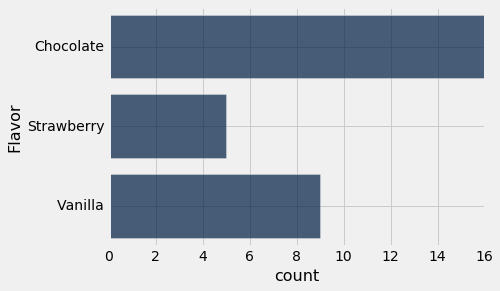

In [34]:
icecream.group_barh("Flavor")

## `barh`

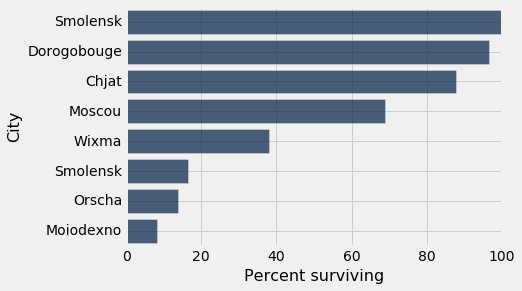

In [43]:
minard_with_proportions.barh("City", "Percent surviving")

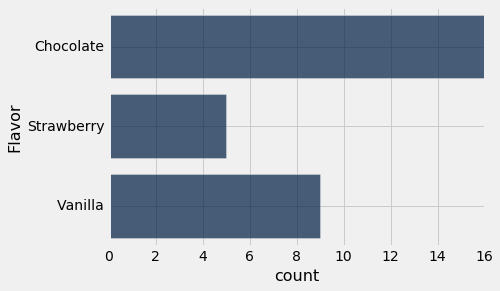

In [35]:
icecream.group("Flavor").barh("Flavor", "count")

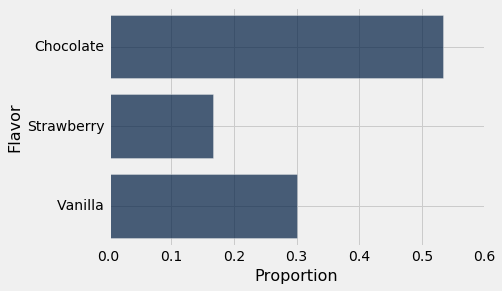

In [39]:
flavor_proportions.barh("Flavor", "Proportion")

## `sort`

In [36]:
flavor_proportions.sort("Proportion")

Flavor,count,Proportion
Strawberry,5,0.166667
Vanilla,9,0.3
Chocolate,16,0.533333


In [37]:
flavor_proportions.sort("Proportion", descending=True)

Flavor,count,Proportion
Chocolate,16,0.533333
Vanilla,9,0.3
Strawberry,5,0.166667


In [38]:
flavor_proportions.sort("count", descending=True) # Same result

Flavor,count,Proportion
Chocolate,16,0.533333
Vanilla,9,0.3
Strawberry,5,0.166667


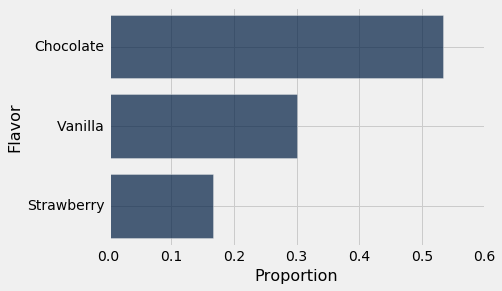

In [41]:
flavor_proportions.sort("Proportion", descending=True).barh("Flavor", "Proportion")